# 01 - Data Exploration & Understanding

**Objective:** Load, inspect, and understand the Telco Customer Churn dataset.  
This stage focuses on identifying data types, missing values, and initial insights about the features that may influence customer churn.

**Dataset:** Telco Customer Churn (Kaggle)

# 📦 Import core libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting seaborn style
sns.set_theme(style="whitegrid", palette="pastel")

# 1️⃣ Load and Inspect the Data

In [3]:
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')

In [4]:
# checking shape of the dataset
print(df.shape)

# displaying first 5 rows of the dataset
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset has 7,043 rows/customers and 21 columns/features. Most features are categorical, describing service type and demographics.

# 2️⃣ Assess Data Quality

In [5]:
# check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

There were neither **missing** nor **duplicated** values identified during this overview analysis. 

# 3️⃣ Understand Data Types and Categories

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# seperating categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [9]:
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Numerical Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


### 🧩 Feature Overview

#### **Categorical Columns**
These represent *qualitative* attributes — mostly customer demographics, service types, and contract details.  
Many are binary ("Yes"/"No") or have a small set of discrete options.

The dataset contains **18 categorical features**, including:
- **customerID** — unique customer identifier *(will be dropped later, as it’s not predictive)*  
- **Demographic attributes:** `gender`, `Partner`, `Dependents`  
- **Service-related attributes:** `PhoneService`, `MultipleLines`, `InternetService`,  
  `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,  
  `StreamingTV`, `StreamingMovies`  
- **Account attributes:** `Contract`, `PaperlessBilling`, `PaymentMethod`  
- **Financial attribute:** `TotalCharges` *(stored as text but should be numeric)*  
- **Target variable:** `Churn`

> ⚠️ **Note:** `TotalCharges` is currently stored as an *object* (text) column even though it represents numeric values.  
> This will need to be converted to a numeric type during preprocessing.

---

#### **Numerical Columns**
These are *quantitative* features that represent counts or continuous measures.

The dataset includes **3 numerical features**:
- **SeniorCitizen** — Binary indicator (`0 = No`, `1 = Yes`)  
- **tenure** — Number of months the customer has been with the company  
- **MonthlyCharges** — Current monthly billing amount

These features can be used directly in model training (after scaling).  
`tenure` and `MonthlyCharges` are particularly important — they often correlate strongly with churn.

---


# 4️⃣ Explore the Target Variable `(Churn)`

In [10]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

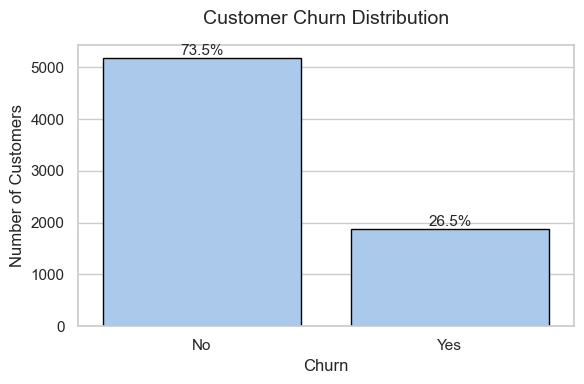

In [14]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df, edgecolor='black')
plt.title('Customer Churn Distribution', fontsize=14, pad=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# adding percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../outputs/visuals/churn_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

**Figure:** Churn distribution among customers.

This visualization shows that roughly one-quarter of customers have churned, indicating a moderately imbalanced dataset.  
The saved plot (`outputs/visuals/churn_distribution.png`) will be used later in the final report and model evaluation summary.